In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/ML/Project_2/train.csv')
test =  pd.read_csv('/content/drive/MyDrive/Datasets/ML/Project_2/test.csv')

In [4]:
# train

In [5]:
# test

In [6]:
print(train.shape)
print(test.shape)

(1537, 56)
(273, 55)


In [7]:
train_null_values = train.isnull()
print(train_null_values.sum())

Unnamed: 0                                     0
id                                             0
owner_1_score                                 21
RATE_owner_1                                  27
CAP_AMOUNT_owner_1                            31
PERCENT_OWN_owner_1                           13
owner_2_score                               1352
RATE_owner_2                                1352
CAP_AMOUNT_owner_2                          1363
PERCENT_OWN_owner_2                         1313
owner_3_score                               1530
RATE_owner_3                                1530
CAP_AMOUNT_owner_3                          1530
PERCENT_OWN_owner_3                         1504
years_in_business                             12
RATE_ID_FOR_years_in_business                 12
fsr                                          417
RATE_ID_FOR_fsr                             1522
location                                      10
RATE_ID_FOR_location                          64
funded_last_30      

In [8]:
test_null_values = test.isnull()
print(test_null_values.sum())

Unnamed: 0                                    0
id                                            0
owner_1_score                                 3
RATE_owner_1                                  3
CAP_AMOUNT_owner_1                            4
PERCENT_OWN_owner_1                           4
owner_2_score                               244
RATE_owner_2                                244
CAP_AMOUNT_owner_2                          245
PERCENT_OWN_owner_2                         238
owner_3_score                               270
RATE_owner_3                                270
CAP_AMOUNT_owner_3                          270
PERCENT_OWN_owner_3                         264
years_in_business                             4
RATE_ID_FOR_years_in_business                 4
fsr                                          78
RATE_ID_FOR_fsr                             269
location                                      1
RATE_ID_FOR_location                         10
funded_last_30                          

In [9]:
col_empty = [
    "RATE_owner_2",
    "CAP_AMOUNT_owner_2",
    "PERCENT_OWN_owner_2",
    "owner_3_score",
    "RATE_owner_3",
    "CAP_AMOUNT_owner_3",
    "PERCENT_OWN_owner_3",
    "owner_2_score",
    "RATE_ID_FOR_funded_last_30",
    "INPUT_VALUE_ID_FOR_judgement_lien_time",
    "RATE_ID_FOR_judgement_lien_time",
    "RATE_ID_FOR_avg_net_deposits",
    "RATE_ID_FOR_industry_type"
]

train.drop(columns=col_empty, inplace=True)
train.drop(columns=['Unnamed: 0', 'id'], inplace=True)

id_column = test['Unnamed: 0']
test.drop(columns=col_empty, inplace=True)
test.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [10]:
print(train.shape)
print(test.shape)

(1537, 41)
(273, 40)


In [11]:
def GetRateFSR(score):
    if 66 <= score <= 100:
        return 'A'
    elif 31 <= score <= 66:
        return 'B'
    elif 11 <= score <= 30:
        return 'C'
    elif 4 <= score <= 10:
        return 'D'
    elif 1 <= score <= 3:
        return 'E'
    else:
        return 'Invalid Score'

train["RATE_ID_FOR_fsr"] = train["fsr"].apply(GetRateFSR)

test["RATE_ID_FOR_fsr"] = test["fsr"].apply(GetRateFSR)

In [12]:
# impute numeric data
col_num = [
    'owner_1_score',
    'CAP_AMOUNT_owner_1',
    'PERCENT_OWN_owner_1',
    'years_in_business',
    'fsr',
    'INPUT_VALUE_ID_FOR_tax_lien_count',
    'INPUT_VALUE_ID_FOR_current_position',
    'INPUT_VALUE_owner_4',
    'INPUT_VALUE_ID_FOR_avg_net_deposits',
    'CAP_AMOUNT_owner_4',
    'PERCENT_OWN_owner_4'
]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for column in col_num:
   # training data
    train[column] = imp_mean.fit_transform(train[[column]])

    # the test data
    test[column] = imp_mean.transform(test[[column]])

In [13]:
# impute categorical data
col_categ = [
    'RATE_owner_1',
    'RATE_ID_FOR_years_in_business',
    'location',
    'RATE_ID_FOR_location',
    'RATE_ID_FOR_fsr',
    'RATE_ID_FOR_num_negative_days',
    'RATE_ID_FOR_tax_lien_count',
    'RATE_ID_FOR_current_position',
    'INPUT_VALUE_ID_FOR_industry_type',
    'RATE_owner_4',
    'funded_last_30',
    'RATE_ID_FOR_judgement_lien_percent',
    'RATE_ID_FOR_judgement_lien_amount',
    'RATE_ID_FOR_num_negative_days',
    'RATE_ID_FOR_num_deposits',
    'RATE_ID_FOR_monthly_gross',
    'RATE_ID_FOR_average_ledger',
    'RATE_ID_FOR_fc_margin',
    'RATE_ID_FOR_tax_lien_amount',
    'RATE_ID_FOR_tax_lien_percent',
    'RATE_ID_FOR_tax_lien_count',
    'RATE_ID_FOR_current_position',
    'INPUT_VALUE_ID_FOR_industry_type',
    'RATE_owner_4',
    'completion_status'
]

imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in col_categ:
    if col in train.columns:
        # Training data
        train[col] = train[col].astype('category')
        train_imp = imputer_mode.fit_transform(train[[col]])
        train[col] = pd.Series(train_imp.flatten(), index=train.index)

    if col in test.columns:
        # Test data
        test[col] = test[col].astype('category')
        test_imp = imputer_mode.transform(test[[col]])
        test[col] = pd.Series(test_imp.flatten(), index=test.index)


In [14]:
train_null_values = test.isnull()
print(train_null_values.sum())

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
RATE_ID_FOR_fsr                             0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger 

In [15]:
test_null_values = test.isnull()
print(test_null_values.sum())

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
RATE_ID_FOR_fsr                             0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger 

In [16]:
# Encodeing categorical data
le = LabelEncoder()
train_en = train.copy()
test_en = test.copy()

for feature in col_categ:
    if feature in train.columns:
        train_en[feature] = le.fit_transform(train_en[feature])

    if feature in test.columns:
        test_en[feature] = le.transform(test_en[feature])

In [17]:
# train_en

In [18]:
# test_en

In [19]:
# Extracting and removing target column
col_en_target = train_en['completion_status']
train_en.drop(columns=['completion_status'], inplace=True)
print(train_en.shape)

(1537, 40)


In [20]:
# Scalind data
Zscore = StandardScaler()
col_num = train.select_dtypes(include=[np.number]).columns

train_scaled = train_en.copy()
test_scaled = test_en.copy()

train_scaled[col_num] = Zscore.fit_transform(train_scaled[col_num])
test_scaled[col_num] = Zscore.transform(test_scaled[col_num])

In [21]:
# train_scaled

In [22]:
# test_scaled

In [23]:
# PCA for train_scaled
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(train_scaled)

In [24]:
train_pca = pd.DataFrame(data=pca_components)

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)
print("Principal components:")
print(train_pca)

Explained variance ratio:
[0.17082888 0.14129436 0.11231104 0.09154005 0.07284856 0.05957791
 0.05743434 0.04087875 0.03725318 0.03224337 0.03051734 0.02439231
 0.02306128 0.02197089 0.01570909 0.01437319 0.01180998]
Principal components:
            0         1         2         3         4         5         6   \
0    -2.639833 -0.044291  2.995091  0.424270 -0.158039  0.216645  0.022766   
1     3.223737 -0.418679 -0.005709 -0.107775 -0.215719 -0.206995 -0.056773   
2    -0.444269 -0.333212  2.245298 -1.124363 -0.427546  0.195025 -0.132828   
3    -2.587336 -0.081792  3.015757  0.291208 -0.128947  0.448465 -0.094091   
4    -2.653602 -0.059255  2.986233  0.378366 -0.138026  0.308759 -0.026569   
...        ...       ...       ...       ...       ...       ...       ...   
1532 -2.607903 -0.034123 -0.693516 -2.841185  1.380944 -0.467128 -0.060925   
1533 -3.026598  0.086371  2.582322  0.955245 -0.169098 -1.752514 -1.083486   
1534 -0.694870  0.189972 -1.651149  0.435890 -1.427085  0.2

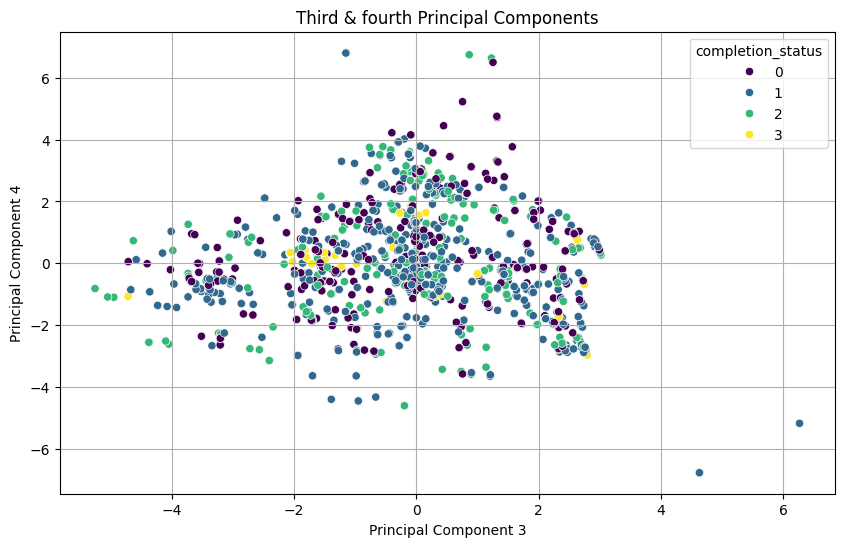

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_pca.iloc[:, 2], y=train_pca.iloc[:, 3], hue=col_en_target, palette='viridis')
plt.title('Third & fourth Principal Components')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.grid(True)
plt.show()

In [26]:
# PCA for test_scaled
test_pca_components = pca.transform(test_scaled)
test_pca = pd.DataFrame(data=test_pca_components)

<ipython-input-27-ecc0b31a2784>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=test_pca.iloc[:, 2], y=test_pca.iloc[:, 3], palette='viridis')


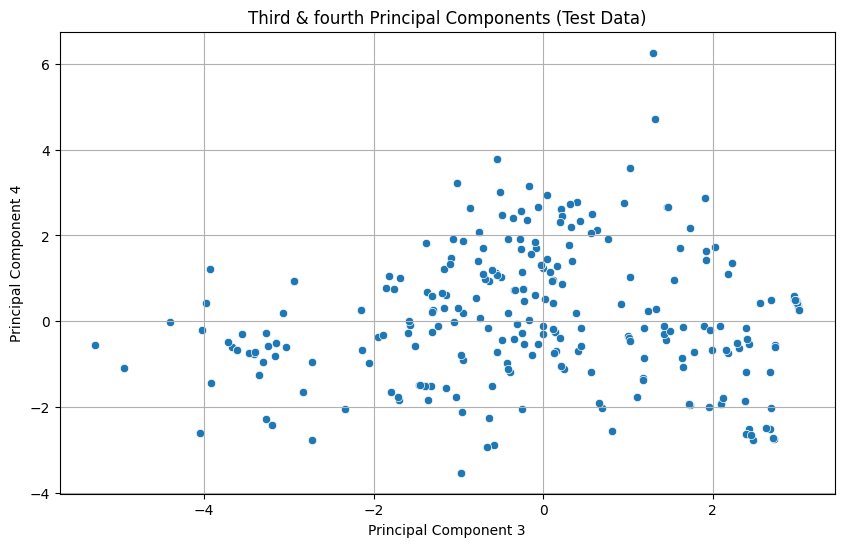

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_pca.iloc[:, 2], y=test_pca.iloc[:, 3], palette='viridis')
plt.title('Third & fourth Principal Components (Test Data)')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.grid(True)
plt.show()

In [28]:
# plt.figure(figsize=(20, 20))
# sns.pairplot(train_pca).iloc[:, :5]
# plt.suptitle('Pairwise PCA Scatter Plot Matrix', size=20)
# plt.show()

In [29]:
# Correlation
corr_matrix = train_scaled.corr()
col = corr_matrix.columns

print(f"{'Column 1':<30} {'Column 2':<30} {'Correlation':<10}")
print("="*74)

for i in range(len(col)):
    for j in range(i + 1, len(col)):
        col1 = col[i]
        col2 = col[j]
        corr_value = corr_matrix.loc[col1, col2]
        if corr_value > 0.5:
            print(f"{col1:<30} {col2:<30} {corr_value:<10.4f}")

Column 1                       Column 2                       Correlation
owner_1_score                  INPUT_VALUE_owner_4            0.7572    
RATE_owner_1                   RATE_owner_4                   0.9396    
CAP_AMOUNT_owner_1             CAP_AMOUNT_owner_4             0.9742    
PERCENT_OWN_owner_1            PERCENT_OWN_owner_4            0.8150    
judgement_lien_percent         INPUT_VALUE_ID_FOR_judgement_lien_amount 0.9990    
judgement_lien_percent         RATE_ID_FOR_judgement_lien_amount 0.9909    
judgement_lien_percent         INPUT_VALUE_ID_FOR_tax_lien_amount 0.9989    
judgement_lien_percent         RATE_ID_FOR_tax_lien_amount    0.9909    
judgement_lien_percent         INPUT_VALUE_ID_FOR_tax_lien_percent 0.9998    
judgement_lien_percent         RATE_ID_FOR_tax_lien_percent   0.9909    
judgement_lien_percent         INPUT_VALUE_ID_FOR_tax_lien_count 0.5410    
judgement_lien_percent         RATE_ID_FOR_tax_lien_count     0.5390    
RATE_ID_FOR_judgement_lie

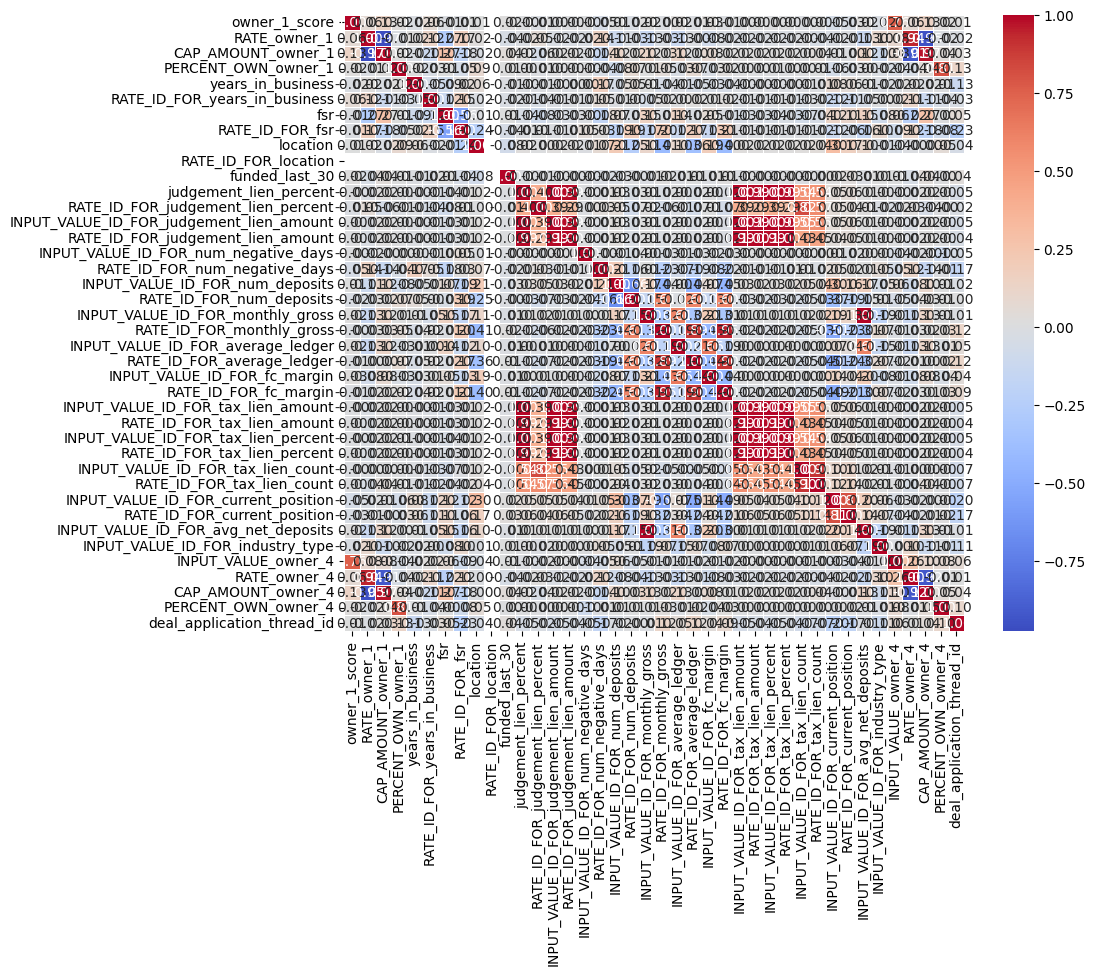

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [51]:
corr_high_unwanted_cols =[
    'INPUT_VALUE_owner_4',
    'RATE_owner_4',
    'CAP_AMOUNT_owner_4',
    'PERCENT_OWN_owner_4',
    'RATE_ID_FOR_tax_lien_amount',
    'RATE_ID_FOR_tax_lien_count',
    'RATE_ID_FOR_tax_lien_percent',
    'INPUT_VALUE_ID_FOR_tax_lien_amount',
    'INPUT_VALUE_ID_FOR_tax_lien_percent',
    'INPUT_VALUE_ID_FOR_tax_lien_count',
    'RATE_ID_FOR_judgement_lien_percent',
    'judgement_lien_percent',
    'RATE_ID_FOR_fc_margin',
    'RATE_ID_FOR_num_deposits',
    'INPUT_VALUE_ID_FOR_avg_net_deposits',
    'RATE_ID_FOR_average_ledger',
    'INPUT_VALUE_ID_FOR_average_ledger',
    'INPUT_VALUE_ID_FOR_judgement_lien_amount',
    'INPUT_VALUE_ID_FOR_current_position',
    'fsr',
    'location',
    'INPUT_VALUE_ID_FOR_num_negative_days',
    'INPUT_VALUE_ID_FOR_monthly_gross',
    'INPUT_VALUE_ID_FOR_industry_type'
    ]
train_feat_ex = train_scaled.copy()
train_feat_ex.drop(columns=corr_high_unwanted_cols, inplace=True)
print(train_feat_ex.shape)


test_feat_ex = test_scaled.copy()
test_feat_ex.drop(columns=corr_high_unwanted_cols, inplace=True)
print(test_feat_ex.shape)


pca_accuracy=[]
selected_accuray=[]
modelnames=["randomforest","svm","knn","logistic","naivebayes"]


(1537, 16)
(273, 16)


In [32]:
# Correlation
corr_matrix = train_feat_ex.corr()
col = corr_matrix.columns

print(f"{'Column 1':<30} {'Column 2':<30} {'Correlation':<10}")
print("="*74)

for i in range(len(col)):
    for j in range(i + 1, len(col)):
        col1 = col[i]
        col2 = col[j]
        corr_value = corr_matrix.loc[col1, col2]
        if corr_value > 0.5:
            print(f"{col1:<30} {col2:<30} {corr_value:<10.4f}")

Column 1                       Column 2                       Correlation



Training RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForest model trained with best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Accuracy: 0.8217
Mean Squared Error (MSE): 0.0026
Mean Absolute Error (MAE): 0.0013
Root Mean Squared Error (RMSE): 0.0510
Best accuracy for RandomForest: 0.8217
RandomForest Test predictions saved to CSV.

Training SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM model trained with best hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Accuracy: 0.7508
Mean Squared Error (MSE): 0.1978
Mean Absolute Error (MAE): 0.1379
Root Mean Squared Error (RMSE): 0.4447
Best accuracy for SVM: 0.7508
SVM Test predictions saved to CSV.

Training KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNN model trained with best hyperparameters: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}
Accuracy: 0.8256
Mean Squared Error (MSE): 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


NaiveBayes model trained with best hyperparameters: {}
Accuracy: 0.2251
Mean Squared Error (MSE): 2.7085
Mean Absolute Error (MAE): 1.3357
Root Mean Squared Error (RMSE): 1.6458
Best accuracy for NaiveBayes: 0.2251
NaiveBayes Test predictions saved to CSV.

Best model: KNN with accuracy: 0.8256


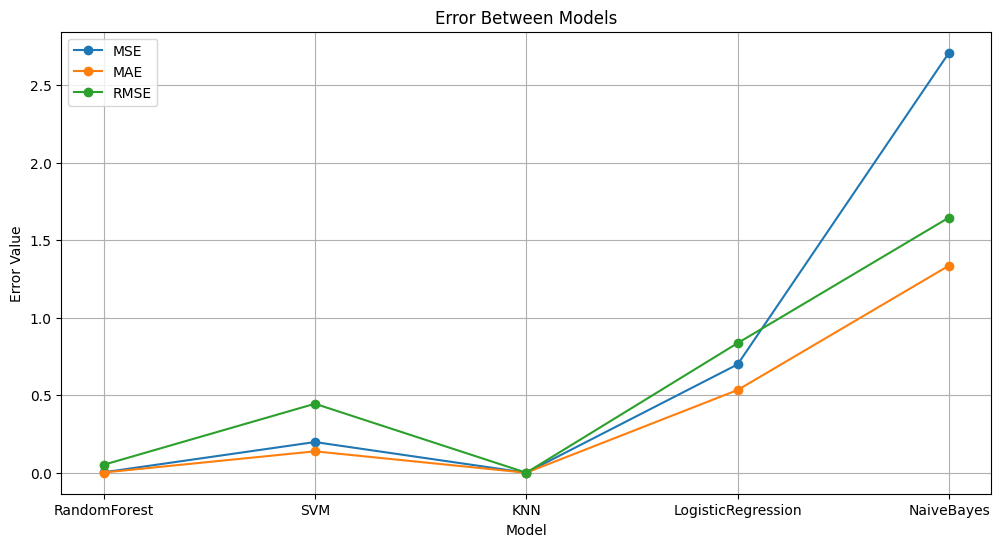

In [52]:
# Define models and hyperparameters
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'NaiveBayes': GaussianNB()
}

parameters = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'NaiveBayes': {}
}

# Arrays to store error values for each model
mse_val = []
mae_val = []
rmse_val = []
model_names = []

best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    print(f"\nTraining {name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=parameters[name],
        n_iter=10,  # Number of parameter settings that are sampled
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(train_pca, col_en_target)

    # Get the best model
    best_model_grid = random_search.best_estimator_
    accuracy = random_search.best_score_
    pca_accuracy.append(accuracy)
    predictions = best_model_grid.predict(train_pca)

    mse = mean_squared_error(col_en_target, predictions)
    mae = mean_absolute_error(col_en_target, predictions)
    rmse = np.sqrt(mse)

    # Append errors to arrays
    mse_val.append(mse)
    mae_val.append(mae)
    rmse_val.append(rmse)
    model_names.append(name)

    print(f'{name} model trained with best hyperparameters: {random_search.best_params_}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'Best accuracy for {name}: {accuracy:.4f}')

    # Save the model predictions
    best_model_grid.fit(train_pca, col_en_target)
    test_predictions = best_model_grid.predict(test_pca)
    test_predictions = le.inverse_transform(test_predictions)
    submission_df = pd.DataFrame({'id': id_column, 'completion_status': test_predictions})
    submission_df.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_PCA_{name}.csv', index=False)
    print(f'{name} Test predictions saved to CSV.')

    # Update best model if current model has better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_model_grid
        best_model_name = name

print(f'\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}')
train_predictions = best_model.predict(train_pca)

# Plotting the errors for each model
plt.figure(figsize=(12, 6))
plt.plot(model_names, mse_val, label='MSE', marker='o')
plt.plot(model_names, mae_val, label='MAE', marker='o')
plt.plot(model_names, rmse_val, label='RMSE', marker='o')
plt.title('Error Between Models')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


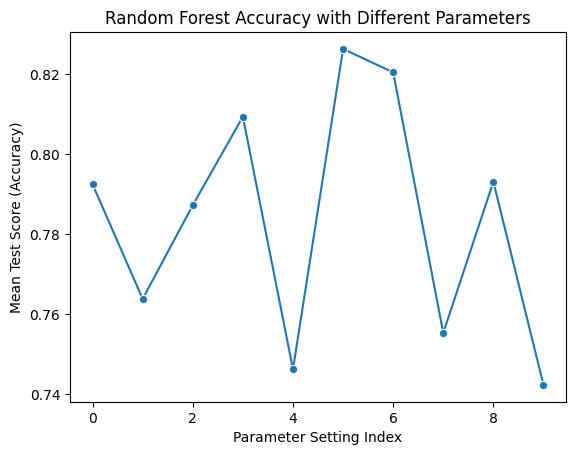

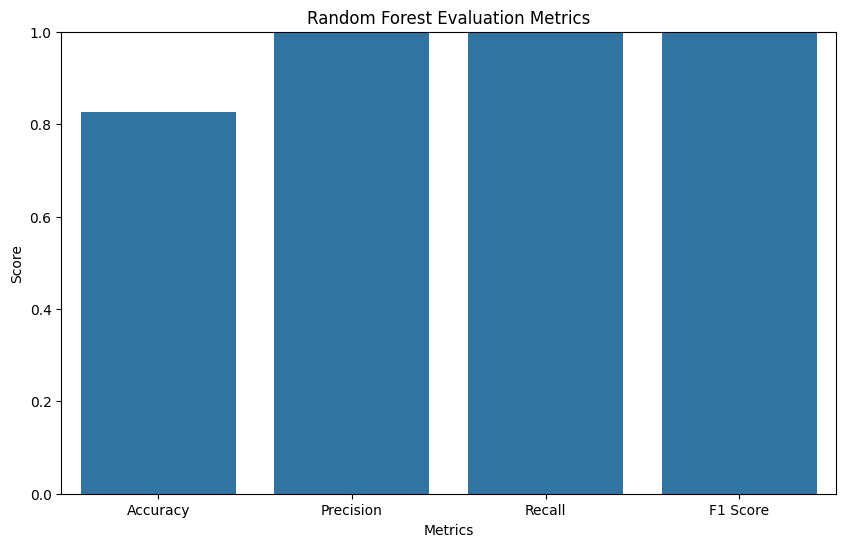

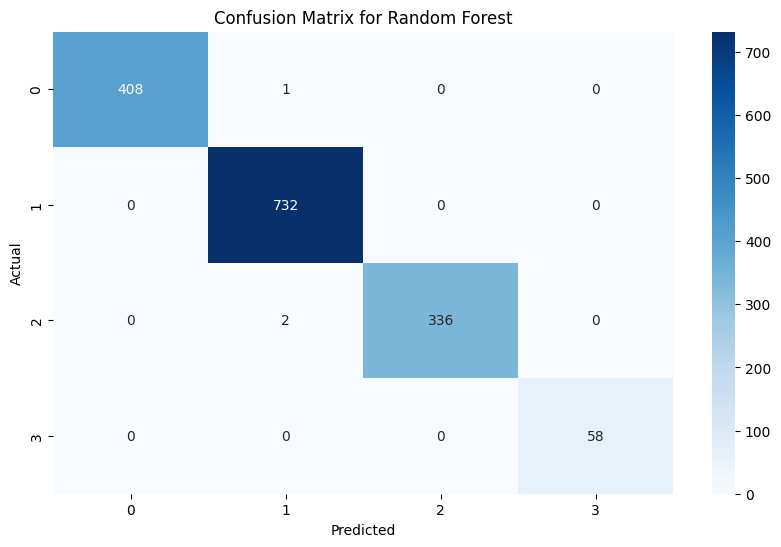

RandomForest test predictions saved to CSV.


In [34]:
# Random Forest Model
random_forest = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=rf_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(train_pca, col_en_target)

# Extract results
results_rf = pd.DataFrame(random_search_rf.cv_results_)

# Plot accuracy with each parameter
sns.lineplot(data=results_rf, x=results_rf.index, y='mean_test_score', marker='o')
plt.title('Random Forest Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_rf = random_search_rf.best_estimator_
accuracy_rf = random_search_rf.best_score_
predictions_rf = best_rf.predict(train_pca)

mse_rf = mean_squared_error(col_en_target, predictions_rf)
mae_rf = mean_absolute_error(col_en_target, predictions_rf)
rmse_rf = np.sqrt(mse_rf)

# Evaluate the model
conf_matrix_rf = confusion_matrix(col_en_target, predictions_rf)
class_report_rf = classification_report(col_en_target, predictions_rf, output_dict=True)
precision_rf = precision_score(col_en_target, predictions_rf, average='weighted')
recall_rf = recall_score(col_en_target, predictions_rf, average='weighted')
f1_rf = f1_score(col_en_target, predictions_rf, average='weighted')

# Plot evaluation metrics
metrics_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics_rf.keys()), y=list(metrics_rf.values()))
plt.title('Random Forest Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_rf.fit(train_pca, col_en_target)
test_predictions_rf = best_rf.predict(test_pca)
test_predictions_rf = le.inverse_transform(test_predictions_rf)
submission_df_rf = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_rf})
submission_df_rf.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_PCA_RandomForest.csv', index=False)
print('RandomForest test predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


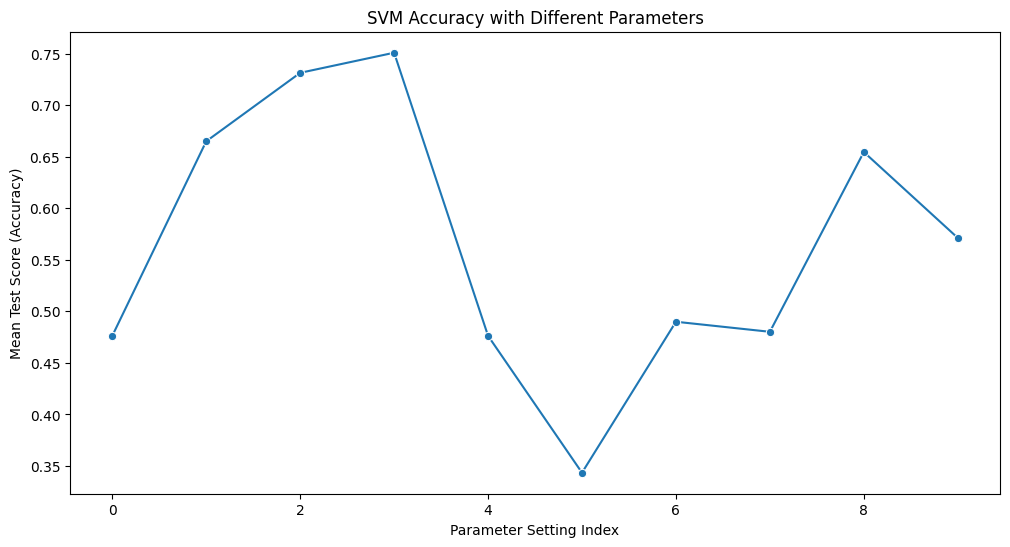

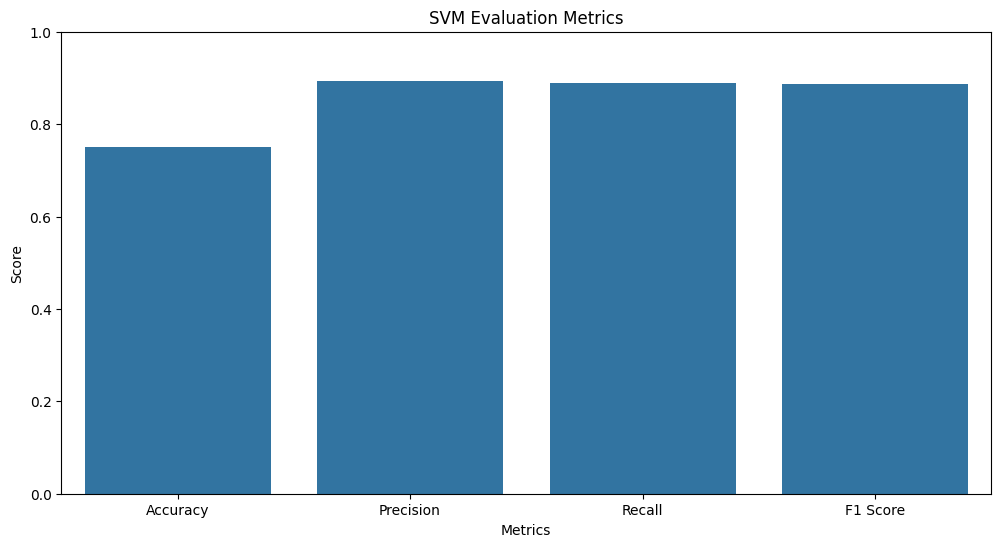

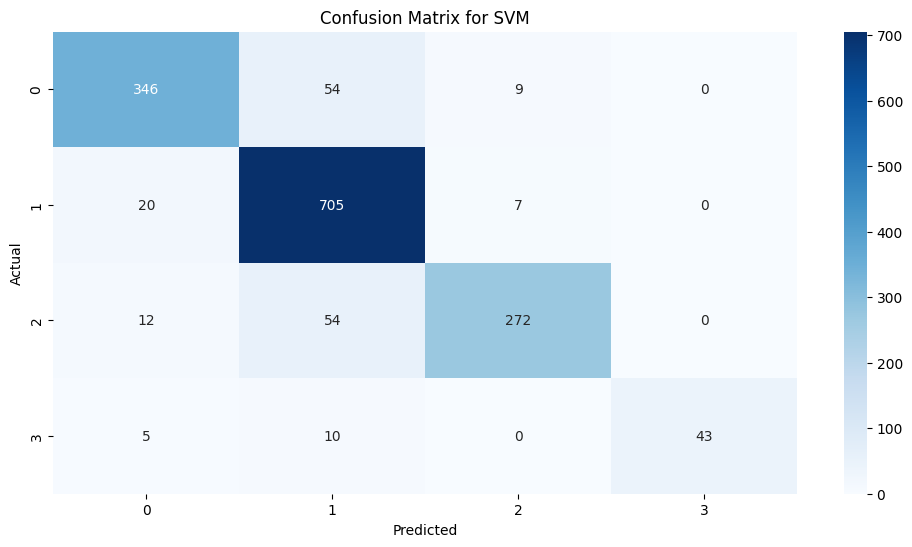

SVM test predictions saved to CSV.


In [35]:
# SVM Model
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=svm_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_svm.fit(train_pca, col_en_target)

# Extract results
results_svm = pd.DataFrame(random_search_svm.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_svm, x=results_svm.index, y='mean_test_score', marker='o')
plt.title('SVM Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_svm = random_search_svm.best_estimator_
accuracy_svm = random_search_svm.best_score_
predictions_svm = best_svm.predict(train_pca)

mse_svm = mean_squared_error(col_en_target, predictions_svm)
mae_svm = mean_absolute_error(col_en_target, predictions_svm)
rmse_svm = np.sqrt(mse_svm)

# Evaluate the model
conf_matrix_svm = confusion_matrix(col_en_target, predictions_svm)
class_report_svm = classification_report(col_en_target, predictions_svm, output_dict=True)
precision_svm = precision_score(col_en_target, predictions_svm, average='weighted')
recall_svm = recall_score(col_en_target, predictions_svm, average='weighted')
f1_svm = f1_score(col_en_target, predictions_svm, average='weighted')

# Plot evaluation metrics
metrics_svm = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_svm.keys()), y=list(metrics_svm.values()))
plt.title('SVM Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_svm.fit(train_pca, col_en_target)
test_predictions_svm = best_svm.predict(test_pca)
test_predictions_svm = le.inverse_transform(test_predictions_svm)
submission_df_svm = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_svm})
submission_df_svm.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_PCA_SVM.csv', index=False)
print('SVM test predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


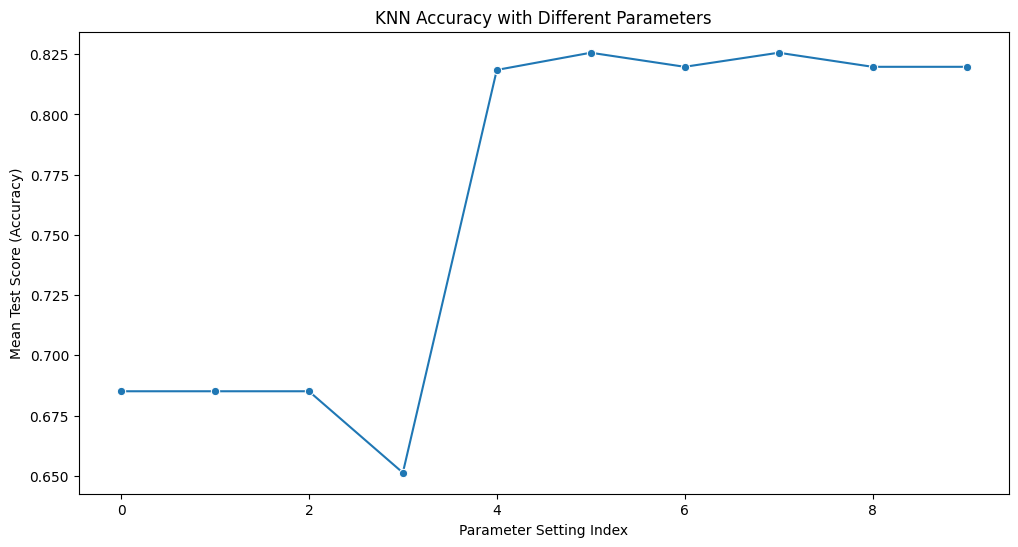

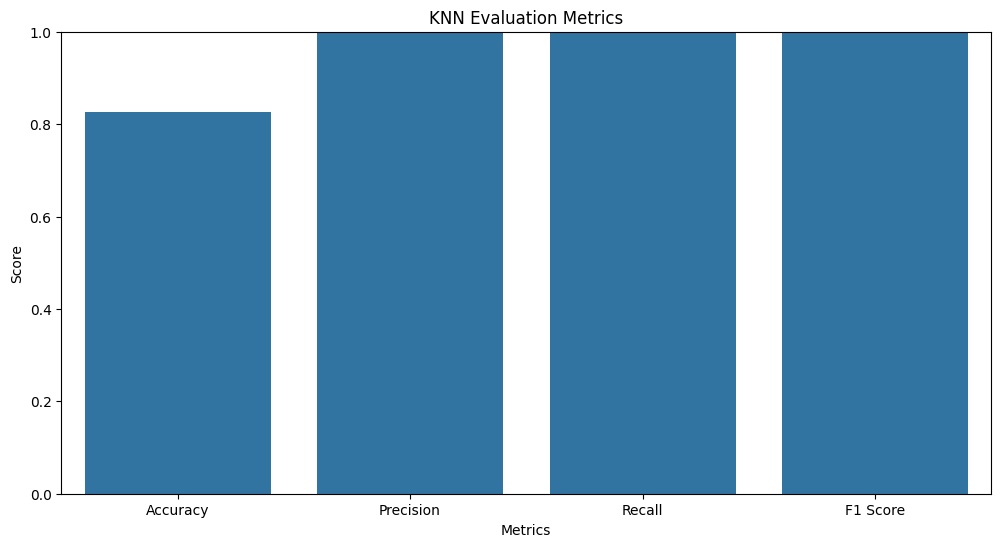

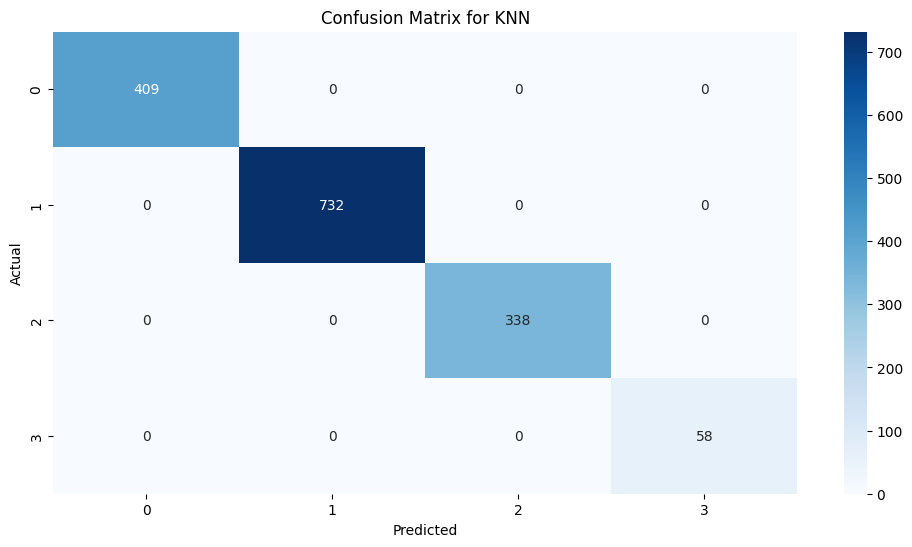

KNN test predictions saved to CSV.


In [36]:
# KNN Model
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(train_pca, col_en_target)

# Extract results
results_knn = pd.DataFrame(random_search_knn.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_knn, x=results_knn.index, y='mean_test_score', marker='o')
plt.title('KNN Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_knn = random_search_knn.best_estimator_
accuracy_knn = random_search_knn.best_score_
predictions_knn = best_knn.predict(train_pca)

mse_knn = mean_squared_error(col_en_target, predictions_knn)
mae_knn = mean_absolute_error(col_en_target, predictions_knn)
rmse_knn = np.sqrt(mse_knn)

# Evaluate the model
conf_matrix_knn = confusion_matrix(col_en_target, predictions_knn)
class_report_knn = classification_report(col_en_target, predictions_knn, output_dict=True)
precision_knn = precision_score(col_en_target, predictions_knn, average='weighted')
recall_knn = recall_score(col_en_target, predictions_knn, average='weighted')
f1_knn = f1_score(col_en_target, predictions_knn, average='weighted')

# Plot evaluation metrics
metrics_knn = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_knn.keys()), y=list(metrics_knn.values()))
plt.title('KNN Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_knn.fit(train_pca, col_en_target)
test_predictions_knn = best_knn.predict(test_pca)
test_predictions_knn = le.inverse_transform(test_predictions_knn)
submission_df_knn = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_knn})
submission_df_knn.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_PCA_KNN.csv', index=False)
print('KNN test predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


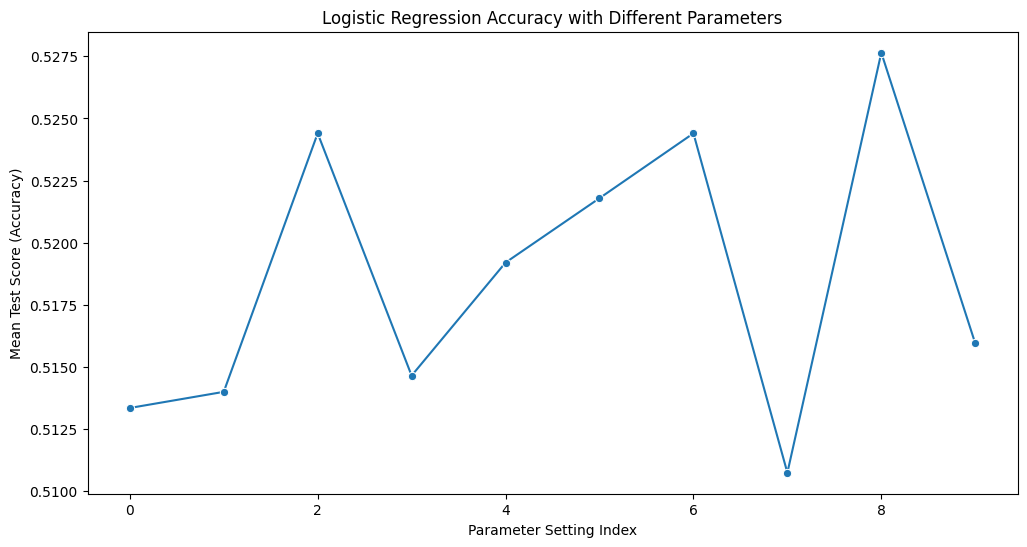

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

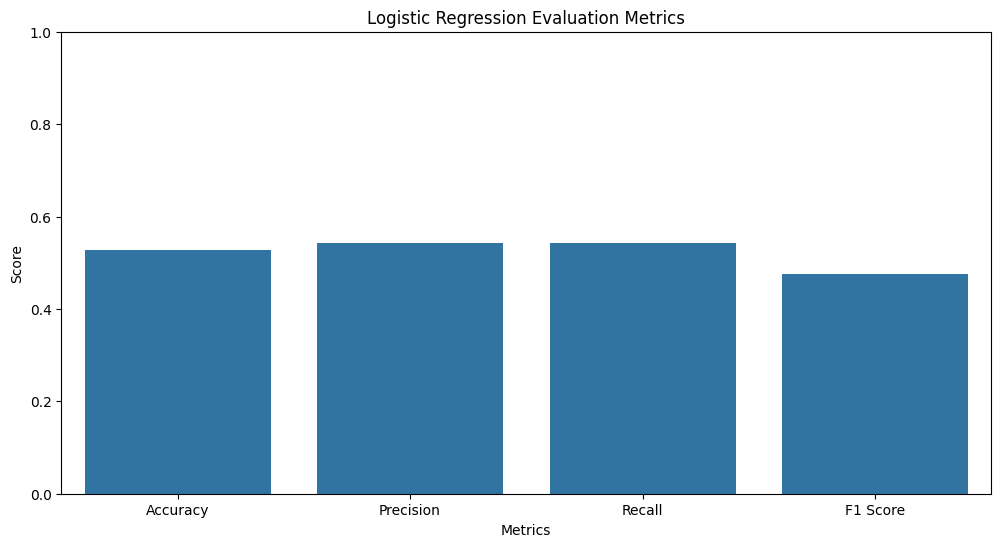

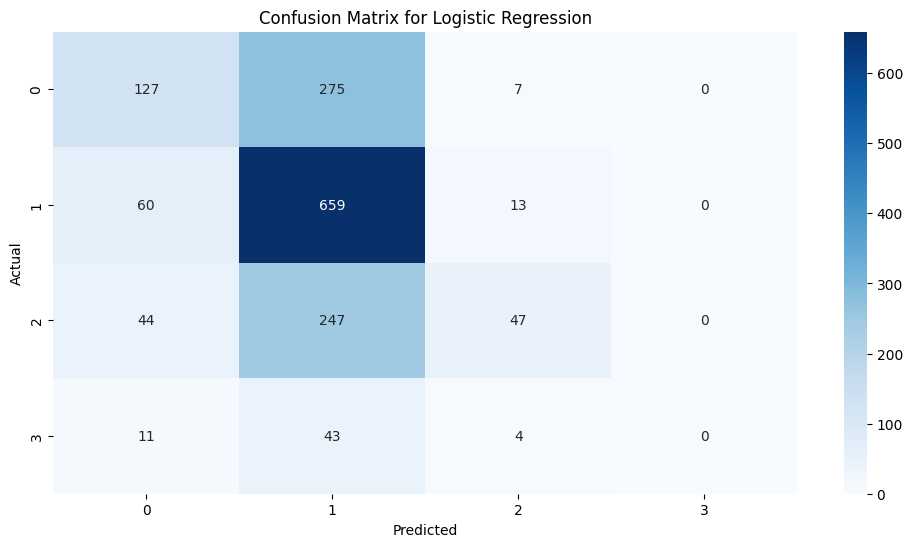

LogisticRegression predictions saved to CSV.


In [37]:
# Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

random_search_lr = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=lr_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_lr.fit(train_pca, col_en_target)

# Extract results
results_lr = pd.DataFrame(random_search_lr.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_lr, x=results_lr.index, y='mean_test_score', marker='o')
plt.title('Logistic Regression Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_lr = random_search_lr.best_estimator_
accuracy_lr = random_search_lr.best_score_
predictions_lr = best_lr.predict(train_pca)

mse_lr = mean_squared_error(col_en_target, predictions_lr)
mae_lr = mean_absolute_error(col_en_target, predictions_lr)
rmse_lr = np.sqrt(mse_lr)

# Evaluate the model
conf_matrix_lr = confusion_matrix(col_en_target, predictions_lr)
class_report_lr = classification_report(col_en_target, predictions_lr, output_dict=True)
precision_lr = precision_score(col_en_target, predictions_lr, average='weighted')
recall_lr = recall_score(col_en_target, predictions_lr, average='weighted')
f1_lr = f1_score(col_en_target, predictions_lr, average='weighted')

# Plot evaluation metrics
metrics_lr = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_lr.keys()), y=list(metrics_lr.values()))
plt.title('Logistic Regression Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_lr.fit(train_pca, col_en_target)
test_predictions_lr = best_lr.predict(test_pca)
test_predictions_lr = le.inverse_transform(test_predictions_lr)
submission_df_lr = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_lr})
submission_df_lr.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_PCA_LogisticRegression.csv', index=False)
print('LogisticRegression predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


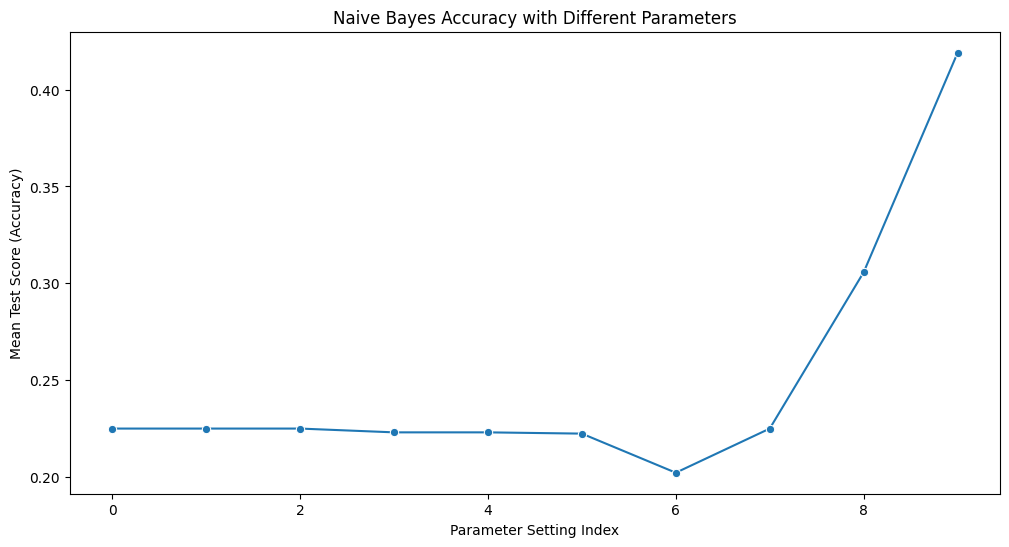

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

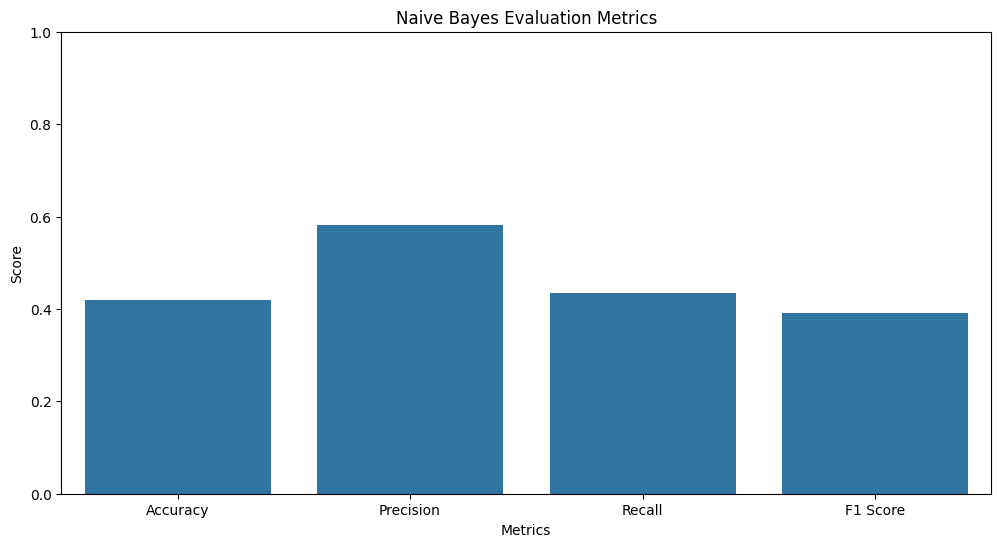

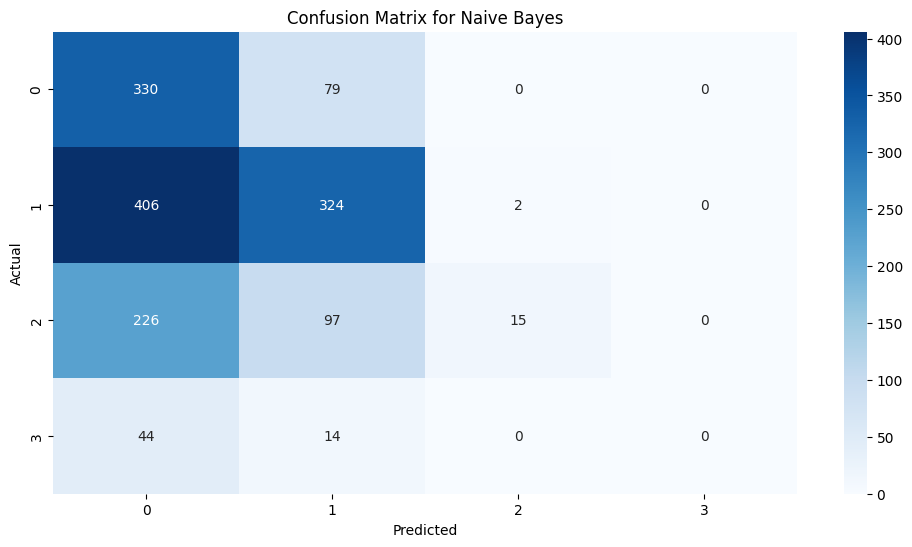

NaiveBayes predictions saved to CSV.


In [41]:
# Naive Bayes Model
naive_bayes = GaussianNB()
nb_params = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

random_search_nb = RandomizedSearchCV(
    estimator=naive_bayes,
    param_distributions=nb_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_nb.fit(train_pca, col_en_target)

# Extract results
results_nb = pd.DataFrame(random_search_nb.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_nb, x=results_nb.index, y='mean_test_score', marker='o')
plt.title('Naive Bayes Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_nb = random_search_nb.best_estimator_
accuracy_nb = random_search_nb.best_score_
predictions_nb = best_nb.predict(train_pca)

mse_nb = mean_squared_error(col_en_target, predictions_nb)
mae_nb = mean_absolute_error(col_en_target, predictions_nb)
rmse_nb = np.sqrt(mse_nb)

# Evaluate the model
conf_matrix_nb = confusion_matrix(col_en_target, predictions_nb)
class_report_nb = classification_report(col_en_target, predictions_nb, output_dict=True)
precision_nb = precision_score(col_en_target, predictions_nb, average='weighted')
recall_nb = recall_score(col_en_target, predictions_nb, average='weighted')
f1_nb = f1_score(col_en_target, predictions_nb, average='weighted')

# Plot evaluation metrics
metrics_nb = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1 Score': f1_nb
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_nb.keys()), y=list(metrics_nb.values()))
plt.title('Naive Bayes Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_nb.fit(train_pca, col_en_target)
test_predictions_nb = best_nb.predict(test_pca)
test_predictions_nb = le.inverse_transform(test_predictions_nb)
submission_df_nb = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_nb})
submission_df_nb.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_PCA_NaiveBayes.csv', index=False)
print('NaiveBayes predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


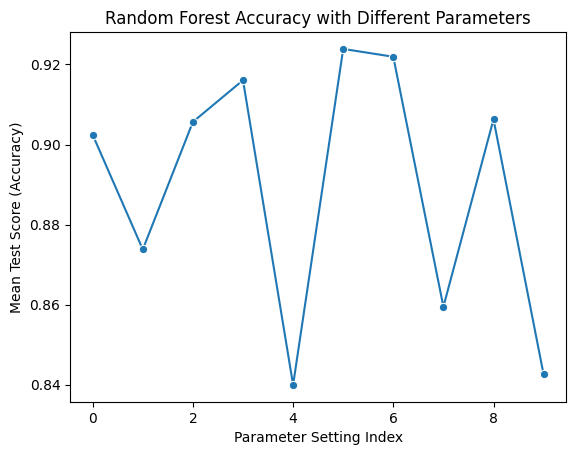

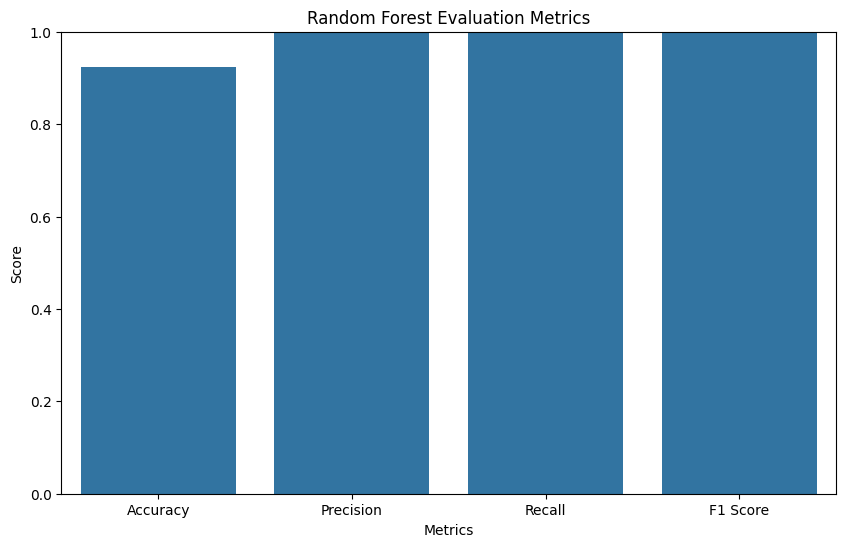

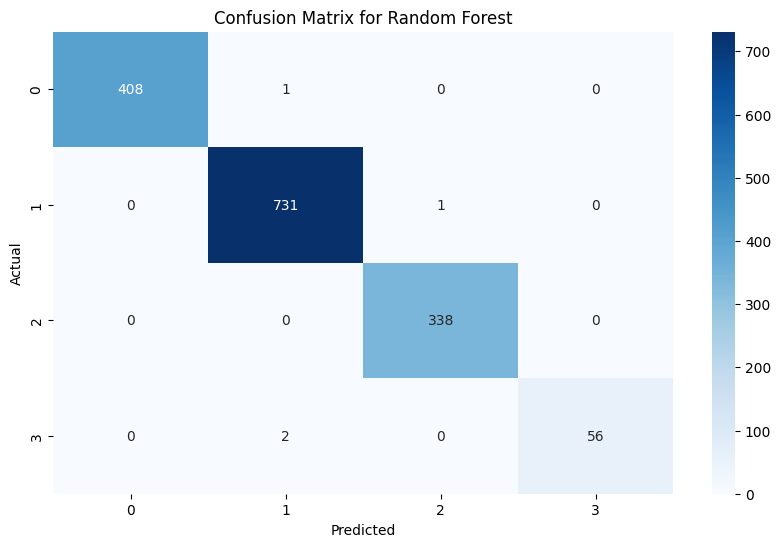

RandomForest predictions saved to CSV.


In [42]:
# Normal Random Forest Model
random_forest = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=rf_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(train_feat_ex, col_en_target)

# Extract results
results_rf = pd.DataFrame(random_search_rf.cv_results_)

# Plot accuracy with each parameter
sns.lineplot(data=results_rf, x=results_rf.index, y='mean_test_score', marker='o')
plt.title('Random Forest Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_rf = random_search_rf.best_estimator_
accuracy_rf = random_search_rf.best_score_
predictions_rf = best_rf.predict(train_feat_ex)

mse_rf = mean_squared_error(col_en_target, predictions_rf)
mae_rf = mean_absolute_error(col_en_target, predictions_rf)
rmse_rf = np.sqrt(mse_rf)

# Evaluate the model
conf_matrix_rf = confusion_matrix(col_en_target, predictions_rf)
class_report_rf = classification_report(col_en_target, predictions_rf, output_dict=True)
precision_rf = precision_score(col_en_target, predictions_rf, average='weighted')
recall_rf = recall_score(col_en_target, predictions_rf, average='weighted')
f1_rf = f1_score(col_en_target, predictions_rf, average='weighted')

# Plot evaluation metrics
metrics_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics_rf.keys()), y=list(metrics_rf.values()))
plt.title('Random Forest Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_rf.fit(train_feat_ex, col_en_target)
test_predictions_rf = best_rf.predict(test_feat_ex)
test_predictions_rf = le.inverse_transform(test_predictions_rf)
submission_df_rf = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_rf})
submission_df_rf.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_Normal_RandomForest.csv', index=False)
print('RandomForest predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


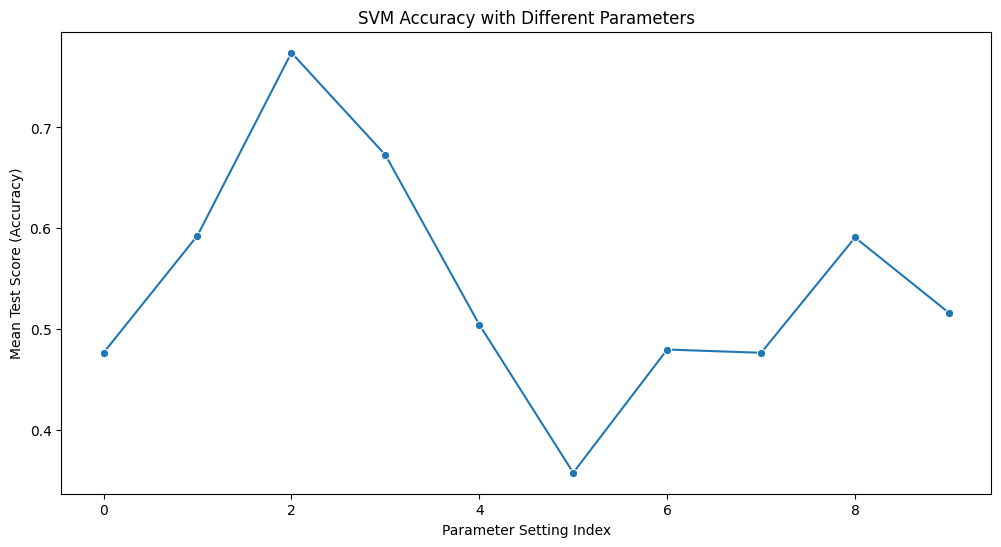

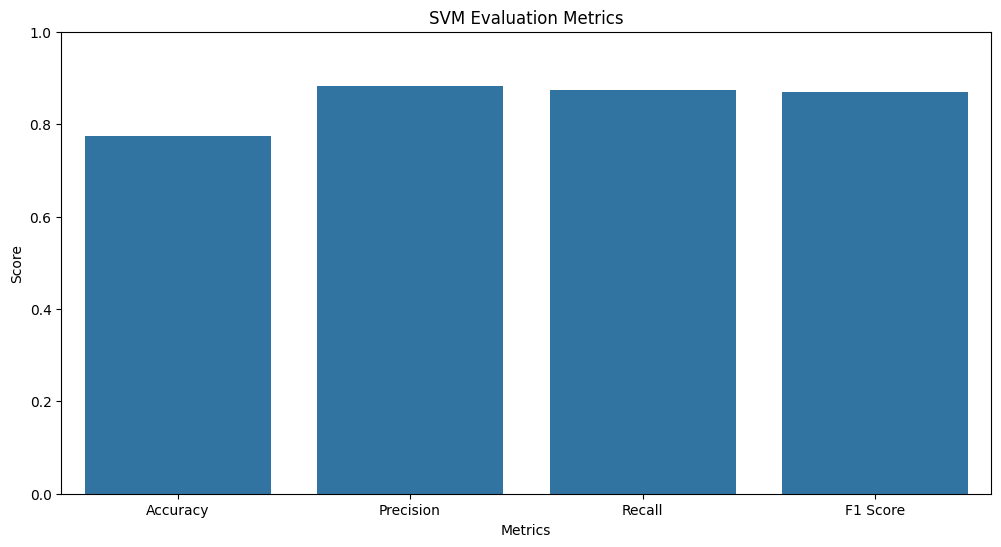

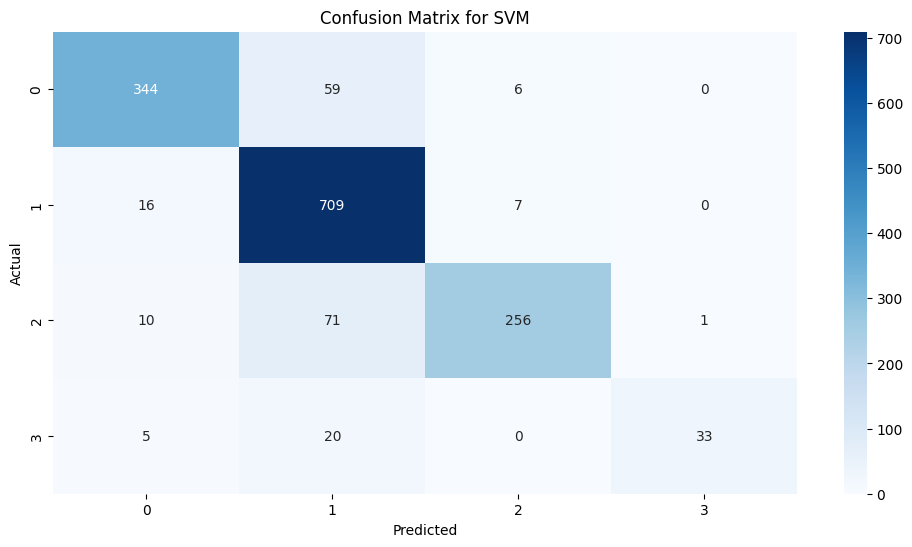

SVM predictions saved to CSV.


In [43]:
# Normal SVM Model
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=svm_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_svm.fit(train_feat_ex, col_en_target)

# Extract results
results_svm = pd.DataFrame(random_search_svm.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_svm, x=results_svm.index, y='mean_test_score', marker='o')
plt.title('SVM Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_svm = random_search_svm.best_estimator_
accuracy_svm = random_search_svm.best_score_
predictions_svm = best_svm.predict(train_feat_ex)

mse_svm = mean_squared_error(col_en_target, predictions_svm)
mae_svm = mean_absolute_error(col_en_target, predictions_svm)
rmse_svm = np.sqrt(mse_svm)

# Evaluate the model
conf_matrix_svm = confusion_matrix(col_en_target, predictions_svm)
class_report_svm = classification_report(col_en_target, predictions_svm, output_dict=True)
precision_svm = precision_score(col_en_target, predictions_svm, average='weighted')
recall_svm = recall_score(col_en_target, predictions_svm, average='weighted')
f1_svm = f1_score(col_en_target, predictions_svm, average='weighted')

# Plot evaluation metrics
metrics_svm = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_svm.keys()), y=list(metrics_svm.values()))
plt.title('SVM Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_svm.fit(train_feat_ex, col_en_target)
test_predictions_svm = best_svm.predict(test_feat_ex)
test_predictions_svm = le.inverse_transform(test_predictions_svm)
submission_df_svm = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_svm})
submission_df_svm.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_Normal_SVM.csv', index=False)
print('SVM predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


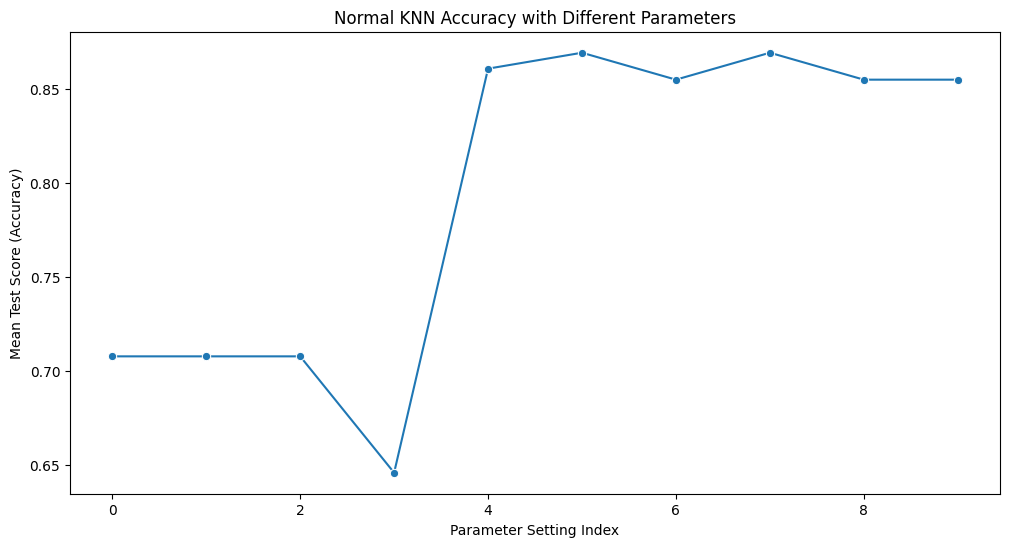

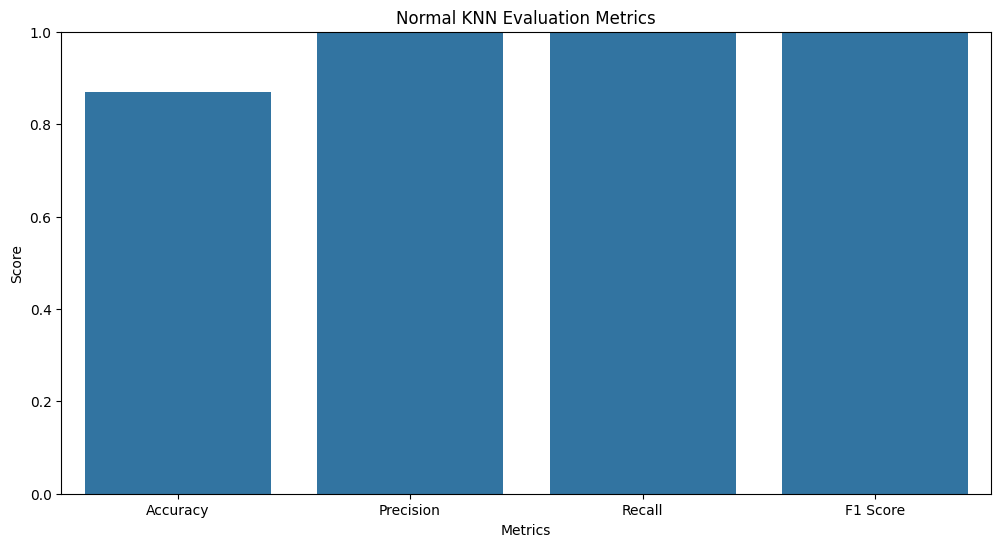

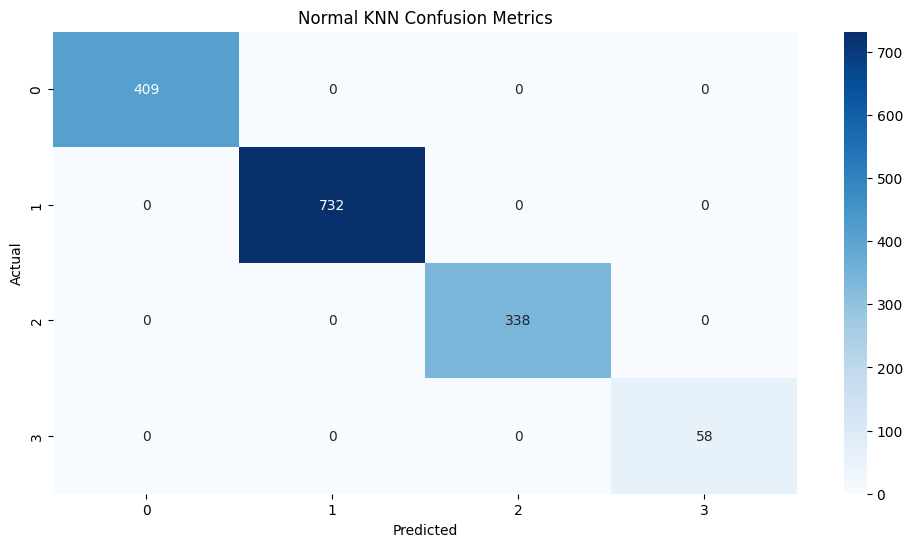

KNN predictions saved to CSV.


In [44]:
# Normal KNN Model
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(train_feat_ex, col_en_target)

# Extract results
results_knn = pd.DataFrame(random_search_knn.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_knn, x=results_knn.index, y='mean_test_score', marker='o')
plt.title('Normal KNN Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_knn = random_search_knn.best_estimator_
accuracy_knn = random_search_knn.best_score_
predictions_knn = best_knn.predict(train_feat_ex)

mse_knn = mean_squared_error(col_en_target, predictions_knn)
mae_knn = mean_absolute_error(col_en_target, predictions_knn)
rmse_knn = np.sqrt(mse_knn)

# Evaluate the model
conf_matrix_knn = confusion_matrix(col_en_target, predictions_knn)
class_report_knn = classification_report(col_en_target, predictions_knn, output_dict=True)
precision_knn = precision_score(col_en_target, predictions_knn, average='weighted')
recall_knn = recall_score(col_en_target, predictions_knn, average='weighted')
f1_knn = f1_score(col_en_target, predictions_knn, average='weighted')

# Plot evaluation metrics
metrics_knn = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_knn.keys()), y=list(metrics_knn.values()))
plt.title('Normal KNN Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Normal KNN Confusion Metrics')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_knn.fit(train_feat_ex, col_en_target)
test_predictions_knn = best_knn.predict(test_feat_ex)
test_predictions_knn = le.inverse_transform(test_predictions_knn)
submission_df_knn = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_knn})
submission_df_knn.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_Normal_KNN.csv', index=False)
print('KNN predictions saved to CSV.')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


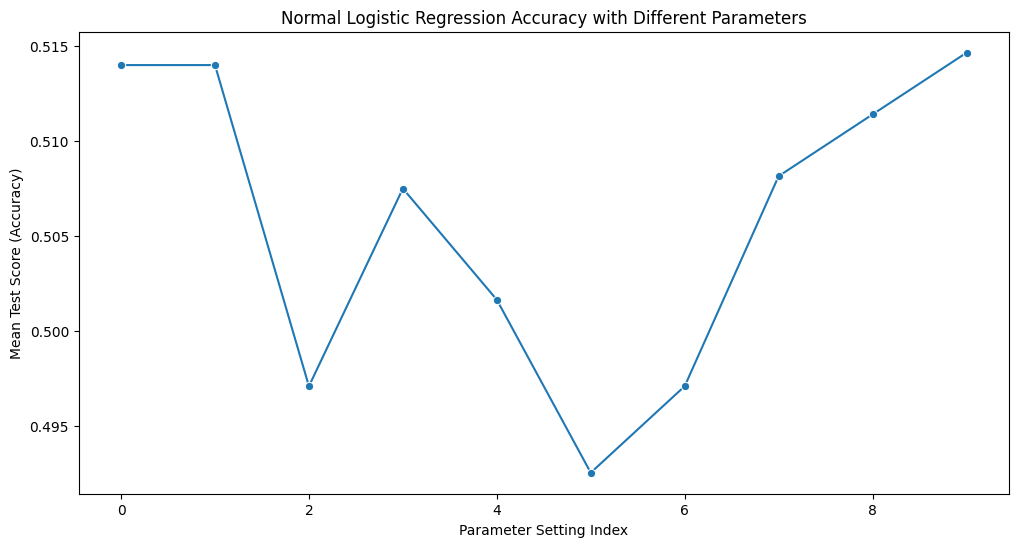

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

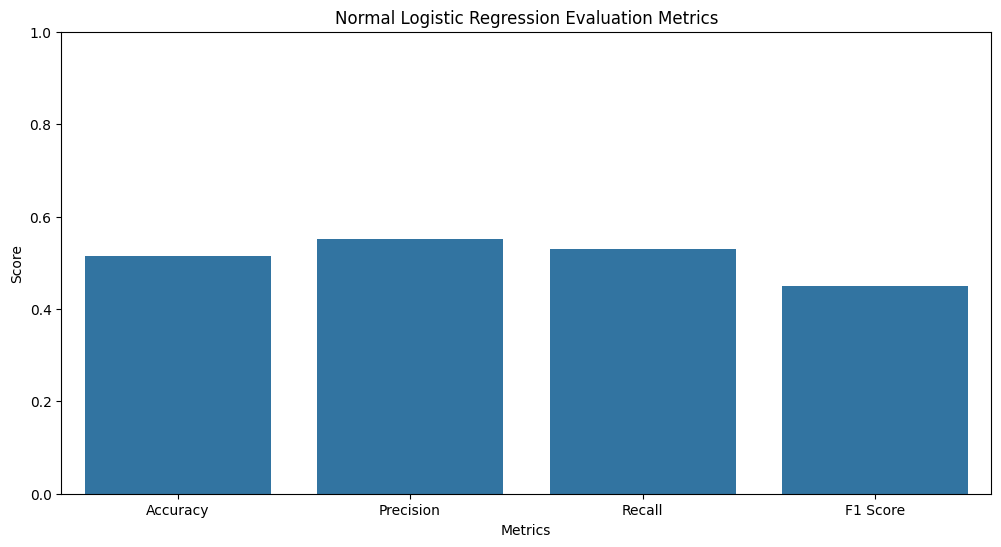

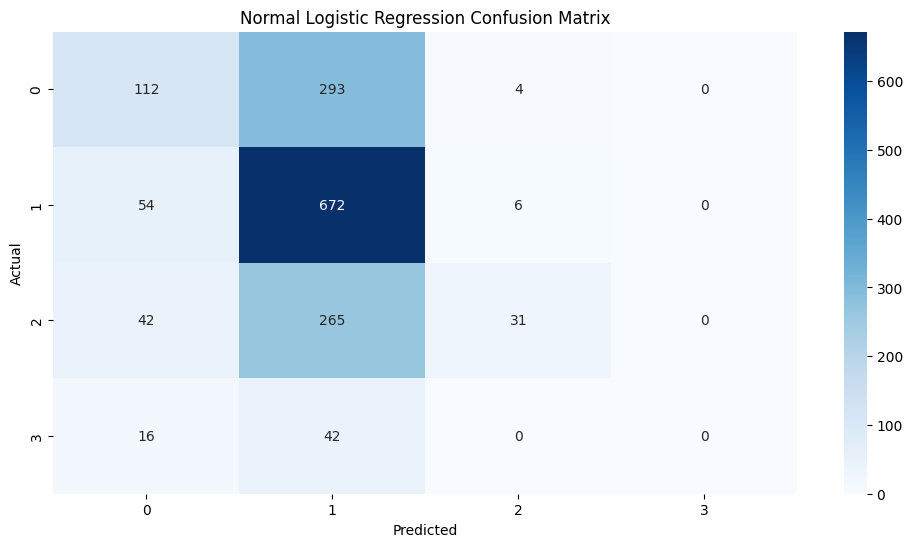

Normal LogisticRegression predictions saved to CSV.


In [47]:
# Normal Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

random_search_lr = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=lr_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_lr.fit(train_feat_ex, col_en_target)

# Extract results
results_lr = pd.DataFrame(random_search_lr.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_lr, x=results_lr.index, y='mean_test_score', marker='o')
plt.title('Normal Logistic Regression Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_lr = random_search_lr.best_estimator_
accuracy_lr = random_search_lr.best_score_
predictions_lr = best_lr.predict(train_feat_ex)

mse_lr = mean_squared_error(col_en_target, predictions_lr)
mae_lr = mean_absolute_error(col_en_target, predictions_lr)
rmse_lr = np.sqrt(mse_lr)

# Evaluate the model
conf_matrix_lr = confusion_matrix(col_en_target, predictions_lr)
class_report_lr = classification_report(col_en_target, predictions_lr, output_dict=True)
precision_lr = precision_score(col_en_target, predictions_lr, average='weighted')
recall_lr = recall_score(col_en_target, predictions_lr, average='weighted')
f1_lr = f1_score(col_en_target, predictions_lr, average='weighted')

# Plot evaluation metrics
metrics_lr = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_lr.keys()), y=list(metrics_lr.values()))
plt.title('Normal Logistic Regression Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Normal Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_lr.fit(train_feat_ex, col_en_target)
test_predictions_lr = best_lr.predict(test_feat_ex)
test_predictions_lr = le.inverse_transform(test_predictions_lr)
submission_df_lr = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_lr})
submission_df_lr.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_Normal_LogisticRegression.csv', index=False)
print('Normal LogisticRegression predictions saved to CSV.')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


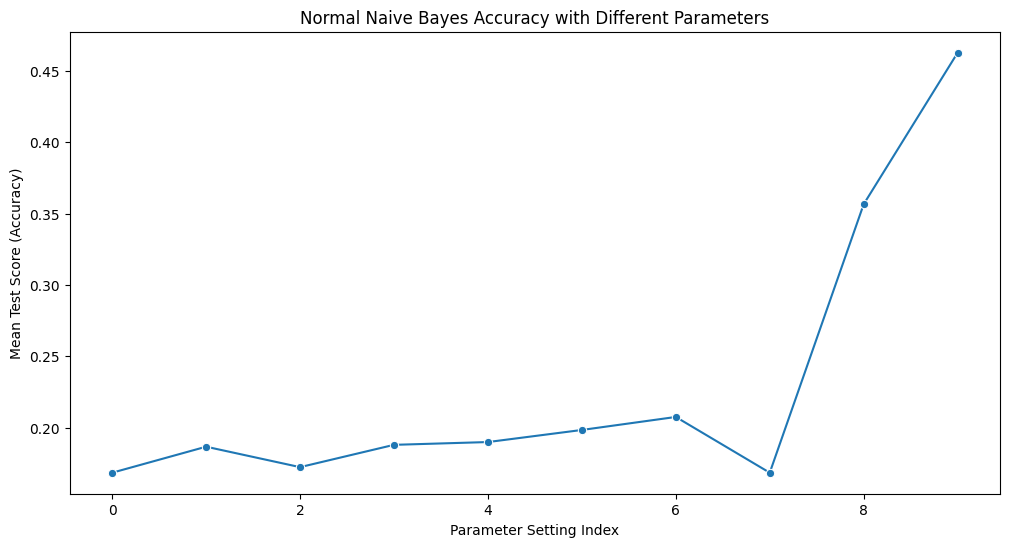

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

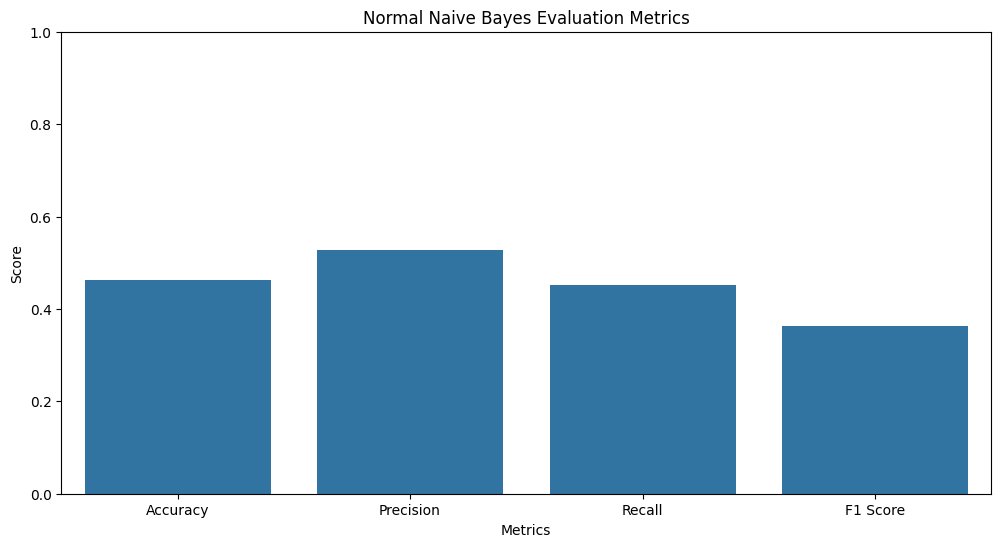

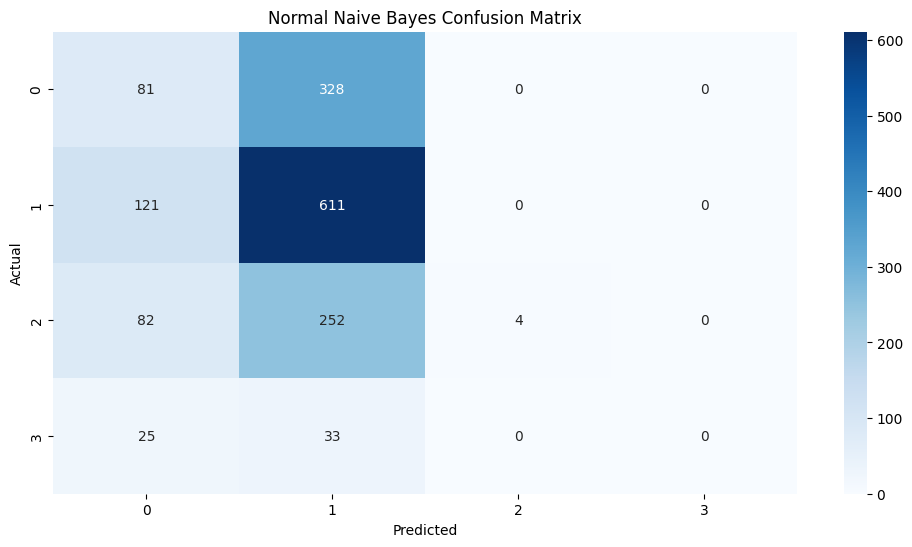

Normal NaiveBayes predictions saved to CSV.


In [48]:
# Normal Naive Bayes Model
naive_bayes = GaussianNB()
nb_params = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

random_search_nb = RandomizedSearchCV(
    estimator=naive_bayes,
    param_distributions=nb_params,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_nb.fit(train_feat_ex, col_en_target)

# Extract results
results_nb = pd.DataFrame(random_search_nb.cv_results_)

# Plot accuracy with each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_nb, x=results_nb.index, y='mean_test_score', marker='o')
plt.title('Normal Naive Bayes Accuracy with Different Parameters')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

best_nb = random_search_nb.best_estimator_
accuracy_nb = random_search_nb.best_score_
predictions_nb = best_nb.predict(train_feat_ex)

mse_nb = mean_squared_error(col_en_target, predictions_nb)
mae_nb = mean_absolute_error(col_en_target, predictions_nb)
rmse_nb = np.sqrt(mse_nb)

# Evaluate the model
conf_matrix_nb = confusion_matrix(col_en_target, predictions_nb)
class_report_nb = classification_report(col_en_target, predictions_nb, output_dict=True)
precision_nb = precision_score(col_en_target, predictions_nb, average='weighted')
recall_nb = recall_score(col_en_target, predictions_nb, average='weighted')
f1_nb = f1_score(col_en_target, predictions_nb, average='weighted')

# Plot evaluation metrics
metrics_nb = {
    'Accuracy': accuracy_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1 Score': f1_nb
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics_nb.keys()), y=list(metrics_nb.values()))
plt.title('Normal Naive Bayes Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Normal Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_nb.fit(train_feat_ex, col_en_target)
test_predictions_nb = best_nb.predict(test_feat_ex)
test_predictions_nb = le.inverse_transform(test_predictions_nb)
submission_df_nb = pd.DataFrame({'id': id_column, 'completion_status': test_predictions_nb})
submission_df_nb.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_Normal_NaiveBayes.csv', index=False)
print('Normal NaiveBayes predictions saved to CSV.')

In [53]:
# Define models and hyperparameters
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'NaiveBayes': GaussianNB()
}

parameters = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'NaiveBayes': {}
}

best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    print(f"\nTraining {name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=parameters[name],
        n_iter=10,  # Number of parameter settings that are sampled
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(train_feat_ex, col_en_target)

    # Get the best model
    best_model_grid = random_search.best_estimator_
    accuracy = random_search.best_score_
    selected_accuray.append(accuracy)
    print(f'Best accuracy for {name}: {accuracy:.4f}')

    # Save the model predictions
    best_model_grid.fit(train_feat_ex, col_en_target)
    test_predictions = best_model_grid.predict(test_feat_ex)
    test_predictions = le.inverse_transform(test_predictions)
    submission_df = pd.DataFrame({'id': id_column, 'completion_status': test_predictions})
    submission_df.to_csv(f'/content/drive/MyDrive/Datasets/ML/Project_2_model_extracted_features_{name}.csv', index=False)
    print(f'{name} predictions saved to CSV.')

    # Update best model if current model has better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_model_grid
        best_model_name = name

print(f'\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}')
train_predictions = best_model.predict(train_feat_ex)

conf_matrix = confusion_matrix(col_en_target, train_predictions)
class_report = classification_report(col_en_target, train_predictions)
accuracy = accuracy_score(col_en_target, train_predictions)

print(f'Confusion Matrix for the best model ({best_model_name}):\n', conf_matrix)
print(f'Classification Report for the best model ({best_model_name}):\n', class_report)
print(f'Accuracy of the best model ({best_model_name}): {accuracy:.4f}')


Training RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best accuracy for RandomForest: 0.9291
RandomForest predictions saved to CSV.

Training SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best accuracy for SVM: 0.7742
SVM predictions saved to CSV.

Training KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best accuracy for KNN: 0.8692
KNN predictions saved to CSV.

Training LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best accuracy for LogisticRegression: 0.5146
LogisticRegression predictions saved to CSV.

Training NaiveBayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best accuracy for NaiveBayes: 0.1685
NaiveBayes predictions saved to CSV.

Best model: RandomForest with accuracy: 0.9291
Confusion Matrix for the best model (RandomForest):
 [[407   0   2   0]
 [  0 731   1   0]
 [  1   1 336   0]
 [  0   1   0  57]]
Classification Report for the best model 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


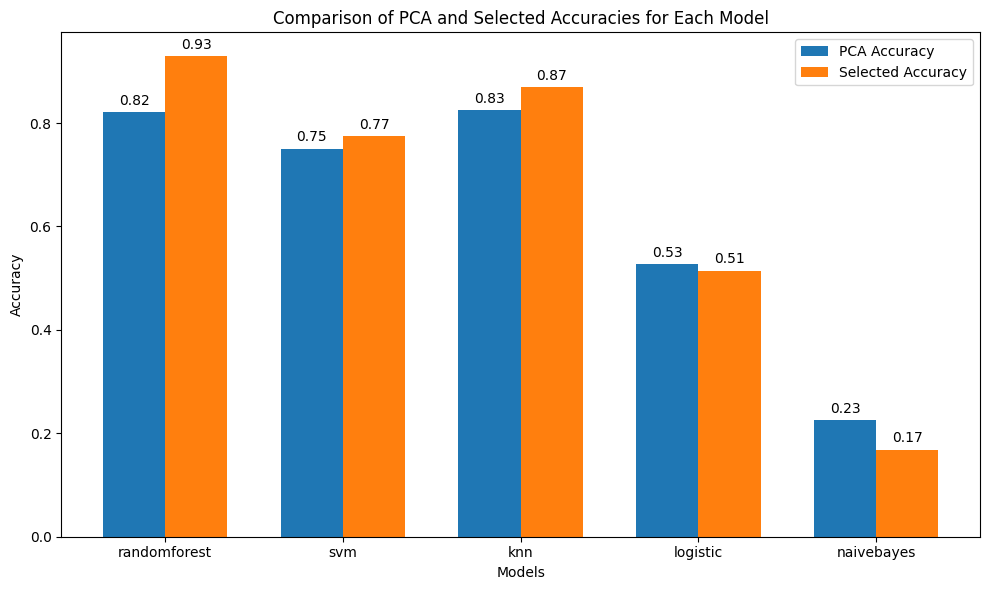

In [56]:
import numpy as np
import matplotlib.pyplot as plt


# Number of models
n_models = len(modelnames)

# Positions of the bars on the x-axis
index = np.arange(n_models)

# Width of a bar
bar_width = 0.35

# Plotting the accuracies
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for PCA accuracies
bars1 = ax.bar(index, pca_accuracy, bar_width, label='PCA Accuracy')

# Bars for Selected accuracies
bars2 = ax.bar(index + bar_width, selected_accuray, bar_width, label='Selected Accuracy')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of PCA and Selected Accuracies for Each Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modelnames)
ax.legend()

# Add data labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
